# **BACS2003 Artificial Intelligence**

## Group Members


| Name | Student ID |
| --- | --- |
| LAU AIK HUNG | 23WMR14555 |
| KESHANDRA A/L JAYASELAN | 23WMR14549 |
| LEONG CHUN XIANG | 23WMR15624 |


## Dataset

In [2]:
!pip install datasets

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
import pandas as pd

from IPython.display import display

# Load the Amazon products dataset
df = pd.read_csv('music_users.csv') 

# Display as a clean table 
display(df)

,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,Female,18,K-Pop,15,Yes,Spotify,UK,Free,High,PC,Afternoon,62
1,2,Male,34,Traditional,16,No,Apple Music,USA,Family,High,PC,Afternoon,19
2,3,Male,32,Chill,15,Yes,NetEase Cloud,Japan,Premium,Medium,Mobile,Afternoon,48
3,4,Male,41,Jazz,16,No,Apple Music,UK,Student,Medium,Smart Speaker,Morning,38
4,5,Male,21,Pop,23,Yes,QQ Music,Korea,Student,Low,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Male,45,Oldies,19,No,YouTube Music,France,Free,Medium,Smart Speaker,Afternoon,12
9996,9997,Female,35,Oldies,17,Yes,Apple Music,USA,Free,High,Tablet,Night,26
9997,9998,Female,28,Traditional,5,No,Apple Music,USA,Student,Low,Tablet,Afternoon,26
9998,9999,Female,25,K-Pop,13,No,NetEase Cloud,France,Free,Medium,PC,Afternoon,76


## Data Analysis

### Data Transformation, Data Preparation

In [5]:
# Check the column names
print(df.columns)

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

Index(['UserID', 'Gender', 'Age', 'FavoriteMusicType', 'WeeklyListeningHours',
       'PaidSubscription', 'ListeningPlatform', 'Country', 'SubscriptionType',
       'GenrePreferenceLevel', 'DeviceType', 'ListeningTimeOfDay',
       'NumberOfPlaylists'],
      dtype='object')


In [6]:
# Check missing values
print(df.isnull().sum())

UserID                  0
Gender                  0
Age                     0
FavoriteMusicType       0
WeeklyListeningHours    0
PaidSubscription        0
ListeningPlatform       0
Country                 0
SubscriptionType        0
GenrePreferenceLevel    0
DeviceType              0
ListeningTimeOfDay      0
NumberOfPlaylists       0
dtype: int64


In [7]:
# check if the datatypes for the data needs to do tranform or not 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   UserID                10000 non-null  int64 
 1   Gender                10000 non-null  object
 2   Age                   10000 non-null  int64 
 3   FavoriteMusicType     10000 non-null  object
 4   WeeklyListeningHours  10000 non-null  int64 
 5   PaidSubscription      10000 non-null  object
 6   ListeningPlatform     10000 non-null  object
 7   Country               10000 non-null  object
 8   SubscriptionType      10000 non-null  object
 9   GenrePreferenceLevel  10000 non-null  object
 10  DeviceType            10000 non-null  object
 11  ListeningTimeOfDay    10000 non-null  object
 12  NumberOfPlaylists     10000 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1015.8+ KB
None


#### Change Gender to 1: Male 2: Female

In [8]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 2})

df

,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,K-Pop,15,Yes,Spotify,UK,Free,High,PC,Afternoon,62
1,2,1,34,Traditional,16,No,Apple Music,USA,Family,High,PC,Afternoon,19
2,3,1,32,Chill,15,Yes,NetEase Cloud,Japan,Premium,Medium,Mobile,Afternoon,48
3,4,1,41,Jazz,16,No,Apple Music,UK,Student,Medium,Smart Speaker,Morning,38
4,5,1,21,Pop,23,Yes,QQ Music,Korea,Student,Low,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,Oldies,19,No,YouTube Music,France,Free,Medium,Smart Speaker,Afternoon,12
9996,9997,2,35,Oldies,17,Yes,Apple Music,USA,Free,High,Tablet,Night,26
9997,9998,2,28,Traditional,5,No,Apple Music,USA,Student,Low,Tablet,Afternoon,26
9998,9999,2,25,K-Pop,13,No,NetEase Cloud,France,Free,Medium,PC,Afternoon,76


#### Replace music genres with corresponding numeric values

In [9]:
# Replace music genres with corresponding numeric values
df['FavoriteMusicType'] = df['FavoriteMusicType'].replace({
    'Rock': 1,
    'Pop': 2,
    'J-Pop': 3,
    'K-Pop': 4,
    'EDM': 5,
    'Jazz': 6,
    'Chill': 7,
    'Oldies': 8,
    'Traditional': 9
})

df

C:\Users\Xiang\AppData\Local\Temp\ipykernel_17880\1985122484.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FavoriteMusicType'] = df['FavoriteMusicType'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,Yes,Spotify,UK,Free,High,PC,Afternoon,62
1,2,1,34,9,16,No,Apple Music,USA,Family,High,PC,Afternoon,19
2,3,1,32,7,15,Yes,NetEase Cloud,Japan,Premium,Medium,Mobile,Afternoon,48
3,4,1,41,6,16,No,Apple Music,UK,Student,Medium,Smart Speaker,Morning,38
4,5,1,21,2,23,Yes,QQ Music,Korea,Student,Low,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,No,YouTube Music,France,Free,Medium,Smart Speaker,Afternoon,12
9996,9997,2,35,8,17,Yes,Apple Music,USA,Free,High,Tablet,Night,26
9997,9998,2,28,9,5,No,Apple Music,USA,Student,Low,Tablet,Afternoon,26
9998,9999,2,25,4,13,No,NetEase Cloud,France,Free,Medium,PC,Afternoon,76


#### Change PaidSubscription to 1:Yes 2:No

In [10]:
# Replace PaidSubscription values: 'Yes' -> 1, 'No' -> 2
df['PaidSubscription'] = df['PaidSubscription'].replace({'Yes': 1, 'No': 2})

df

C:\Users\Xiang\AppData\Local\Temp\ipykernel_17880\1531532316.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PaidSubscription'] = df['PaidSubscription'].replace({'Yes': 1, 'No': 2})


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,1,Spotify,UK,Free,High,PC,Afternoon,62
1,2,1,34,9,16,2,Apple Music,USA,Family,High,PC,Afternoon,19
2,3,1,32,7,15,1,NetEase Cloud,Japan,Premium,Medium,Mobile,Afternoon,48
3,4,1,41,6,16,2,Apple Music,UK,Student,Medium,Smart Speaker,Morning,38
4,5,1,21,2,23,1,QQ Music,Korea,Student,Low,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,2,YouTube Music,France,Free,Medium,Smart Speaker,Afternoon,12
9996,9997,2,35,8,17,1,Apple Music,USA,Free,High,Tablet,Night,26
9997,9998,2,28,9,5,2,Apple Music,USA,Student,Low,Tablet,Afternoon,26
9998,9999,2,25,4,13,2,NetEase Cloud,France,Free,Medium,PC,Afternoon,76


#### Replace ListeningPlatform values with numeric values

In [11]:
# Replace ListeningPlatform values with numeric values
df['ListeningPlatform'] = df['ListeningPlatform'].replace({
    'Spotify': 1,
    'Apple Music': 2,
    'QQ Music': 3,
    'NetEase Cloud': 4,
    'YouTube Music': 5,
    'Amazon Music': 6
})

df

C:\Users\Xiang\AppData\Local\Temp\ipykernel_17880\1675106517.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ListeningPlatform'] = df['ListeningPlatform'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,1,1,UK,Free,High,PC,Afternoon,62
1,2,1,34,9,16,2,2,USA,Family,High,PC,Afternoon,19
2,3,1,32,7,15,1,4,Japan,Premium,Medium,Mobile,Afternoon,48
3,4,1,41,6,16,2,2,UK,Student,Medium,Smart Speaker,Morning,38
4,5,1,21,2,23,1,3,Korea,Student,Low,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,2,5,France,Free,Medium,Smart Speaker,Afternoon,12
9996,9997,2,35,8,17,1,2,USA,Free,High,Tablet,Night,26
9997,9998,2,28,9,5,2,2,USA,Student,Low,Tablet,Afternoon,26
9998,9999,2,25,4,13,2,4,France,Free,Medium,PC,Afternoon,76


#### Replace Country values with numeric values

In [12]:
# Replace Country values with numeric values
df['Country'] = df['Country'].replace({
    'China': 1,
    'USA': 2,
    'Japan': 3,
    'Korea': 4,
    'UK': 5,
    'Germany': 6,
    'France': 7,
    'Brazil': 8,
    'India': 9,
    'Australia': 10
})

df

C:\Users\Xiang\AppData\Local\Temp\ipykernel_17880\2372742991.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Country'] = df['Country'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,1,1,5,Free,High,PC,Afternoon,62
1,2,1,34,9,16,2,2,2,Family,High,PC,Afternoon,19
2,3,1,32,7,15,1,4,3,Premium,Medium,Mobile,Afternoon,48
3,4,1,41,6,16,2,2,5,Student,Medium,Smart Speaker,Morning,38
4,5,1,21,2,23,1,3,4,Student,Low,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,2,5,7,Free,Medium,Smart Speaker,Afternoon,12
9996,9997,2,35,8,17,1,2,2,Free,High,Tablet,Night,26
9997,9998,2,28,9,5,2,2,2,Student,Low,Tablet,Afternoon,26
9998,9999,2,25,4,13,2,4,7,Free,Medium,PC,Afternoon,76


#### Replace SubscriptionType values with numeric values

In [13]:
# Replace SubscriptionType values with numeric values
df['SubscriptionType'] = df['SubscriptionType'].replace({
    'Free': 1,
    'Premium': 2,
    'Family': 3,
    'Student': 4
})

df

C:\Users\Xiang\AppData\Local\Temp\ipykernel_17880\192492915.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['SubscriptionType'] = df['SubscriptionType'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,1,1,5,1,High,PC,Afternoon,62
1,2,1,34,9,16,2,2,2,3,High,PC,Afternoon,19
2,3,1,32,7,15,1,4,3,2,Medium,Mobile,Afternoon,48
3,4,1,41,6,16,2,2,5,4,Medium,Smart Speaker,Morning,38
4,5,1,21,2,23,1,3,4,4,Low,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,2,5,7,1,Medium,Smart Speaker,Afternoon,12
9996,9997,2,35,8,17,1,2,2,1,High,Tablet,Night,26
9997,9998,2,28,9,5,2,2,2,4,Low,Tablet,Afternoon,26
9998,9999,2,25,4,13,2,4,7,1,Medium,PC,Afternoon,76


#### Replace GenrePreferenceLevel values with numeric values

In [14]:
# Replace GenrePreferenceLevel values with numeric values
df['GenrePreferenceLevel'] = df['GenrePreferenceLevel'].replace({
    'High': 1,
    'Medium': 2,
    'Low': 3
})

df

C:\Users\Xiang\AppData\Local\Temp\ipykernel_17880\3488713849.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GenrePreferenceLevel'] = df['GenrePreferenceLevel'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,1,1,5,1,1,PC,Afternoon,62
1,2,1,34,9,16,2,2,2,3,1,PC,Afternoon,19
2,3,1,32,7,15,1,4,3,2,2,Mobile,Afternoon,48
3,4,1,41,6,16,2,2,5,4,2,Smart Speaker,Morning,38
4,5,1,21,2,23,1,3,4,4,3,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,2,5,7,1,2,Smart Speaker,Afternoon,12
9996,9997,2,35,8,17,1,2,2,1,1,Tablet,Night,26
9997,9998,2,28,9,5,2,2,2,4,3,Tablet,Afternoon,26
9998,9999,2,25,4,13,2,4,7,1,2,PC,Afternoon,76


#### Replace DeviceType values with numeric values

In [15]:
# Replace DeviceType values with numeric values
df['DeviceType'] = df['DeviceType'].replace({
    'Mobile': 1,
    'PC': 2,
    'Tablet': 3,
    'Smart Speaker': 4
})

df

C:\Users\Xiang\AppData\Local\Temp\ipykernel_17880\1773138368.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['DeviceType'] = df['DeviceType'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,1,1,5,1,1,2,Afternoon,62
1,2,1,34,9,16,2,2,2,3,1,2,Afternoon,19
2,3,1,32,7,15,1,4,3,2,2,1,Afternoon,48
3,4,1,41,6,16,2,2,5,4,2,4,Morning,38
4,5,1,21,2,23,1,3,4,4,3,1,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,2,5,7,1,2,4,Afternoon,12
9996,9997,2,35,8,17,1,2,2,1,1,3,Night,26
9997,9998,2,28,9,5,2,2,2,4,3,3,Afternoon,26
9998,9999,2,25,4,13,2,4,7,1,2,2,Afternoon,76


#### Replace ListeningTimeOfDay values with numeric values

In [16]:
# Replace ListeningTimeOfDay values with numeric values
df['ListeningTimeOfDay'] = df['ListeningTimeOfDay'].replace({
    'Morning': 1,
    'Afternoon': 2,
    'Evening': 3,
    'Night': 4
})

df

C:\Users\Xiang\AppData\Local\Temp\ipykernel_17880\1792907625.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ListeningTimeOfDay'] = df['ListeningTimeOfDay'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,1,1,5,1,1,2,2,62
1,2,1,34,9,16,2,2,2,3,1,2,2,19
2,3,1,32,7,15,1,4,3,2,2,1,2,48
3,4,1,41,6,16,2,2,5,4,2,4,1,38
4,5,1,21,2,23,1,3,4,4,3,1,2,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,2,5,7,1,2,4,2,12
9996,9997,2,35,8,17,1,2,2,1,1,3,4,26
9997,9998,2,28,9,5,2,2,2,4,3,3,2,26
9998,9999,2,25,4,13,2,4,7,1,2,2,2,76


In [17]:
df = df.drop(['UserID'], axis=1)

# check if the datatypes for the data needs to do tranform or not 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Gender                10000 non-null  int64
 1   Age                   10000 non-null  int64
 2   FavoriteMusicType     10000 non-null  int64
 3   WeeklyListeningHours  10000 non-null  int64
 4   PaidSubscription      10000 non-null  int64
 5   ListeningPlatform     10000 non-null  int64
 6   Country               10000 non-null  int64
 7   SubscriptionType      10000 non-null  int64
 8   GenrePreferenceLevel  10000 non-null  int64
 9   DeviceType            10000 non-null  int64
 10  ListeningTimeOfDay    10000 non-null  int64
 11  NumberOfPlaylists     10000 non-null  int64
dtypes: int64(12)
memory usage: 937.6 KB
None


In [18]:
df.shape

(10000, 12)

In [19]:
df.columns

Index(['Gender', 'Age', 'FavoriteMusicType', 'WeeklyListeningHours',
       'PaidSubscription', 'ListeningPlatform', 'Country', 'SubscriptionType',
       'GenrePreferenceLevel', 'DeviceType', 'ListeningTimeOfDay',
       'NumberOfPlaylists'],
      dtype='object')

## Data Visualization

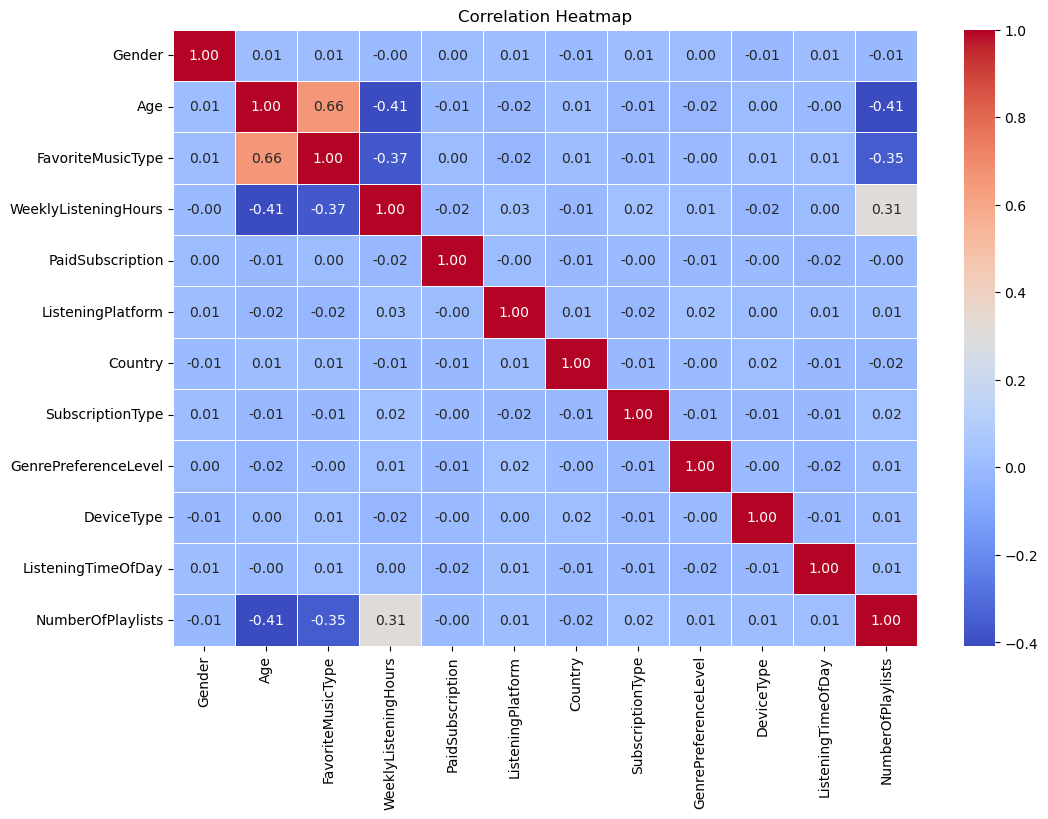

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## K-means

### Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

### Pairplot (for a subset of features)

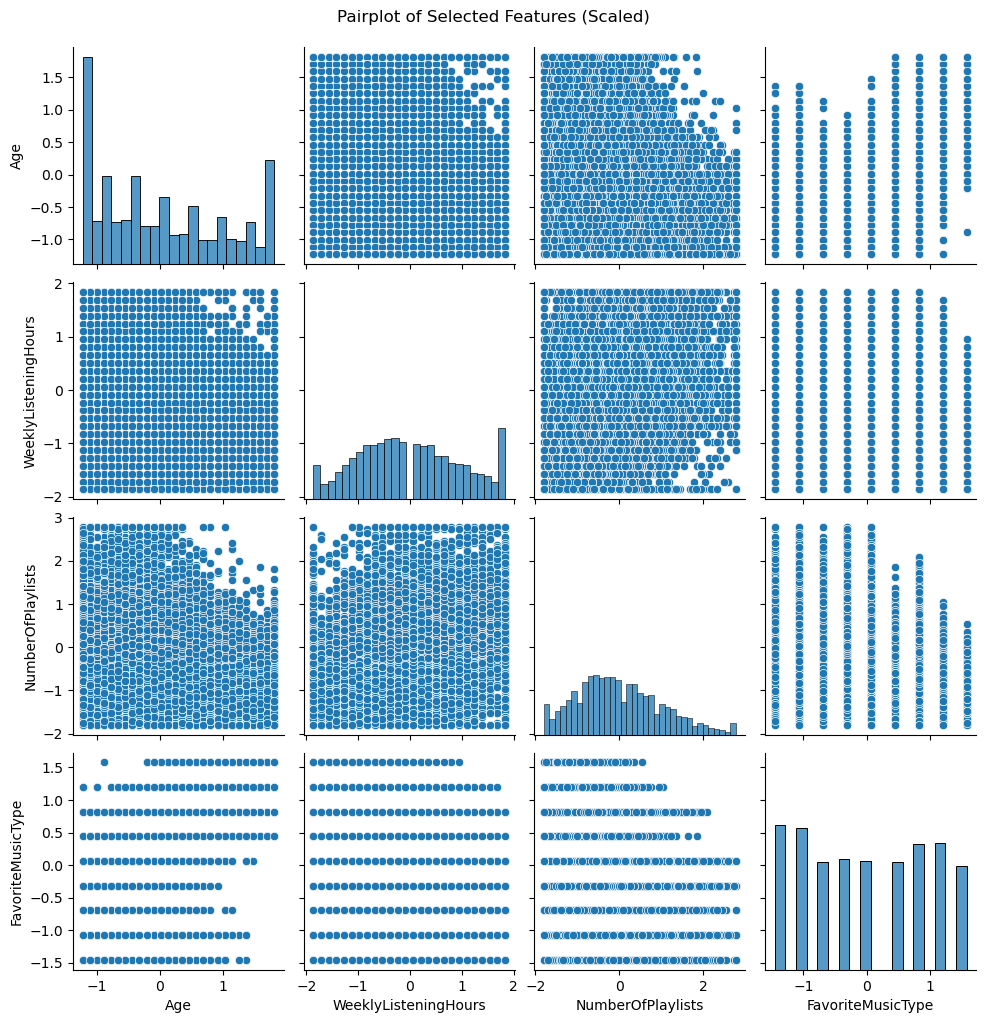

In [22]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_scaled_df = pd.DataFrame(df_scaled, columns=df.columns)

# Step 4: Select important features for pairplot
subset = df_scaled_df[['Age', 'WeeklyListeningHours', 'NumberOfPlaylists', 'FavoriteMusicType']]

# Step 5: Create pairplot
sns.pairplot(subset)
plt.suptitle("Pairplot of Selected Features (Scaled)", y=1.02)
plt.show()


### Heatmap of Correlation (on Scaled Data)

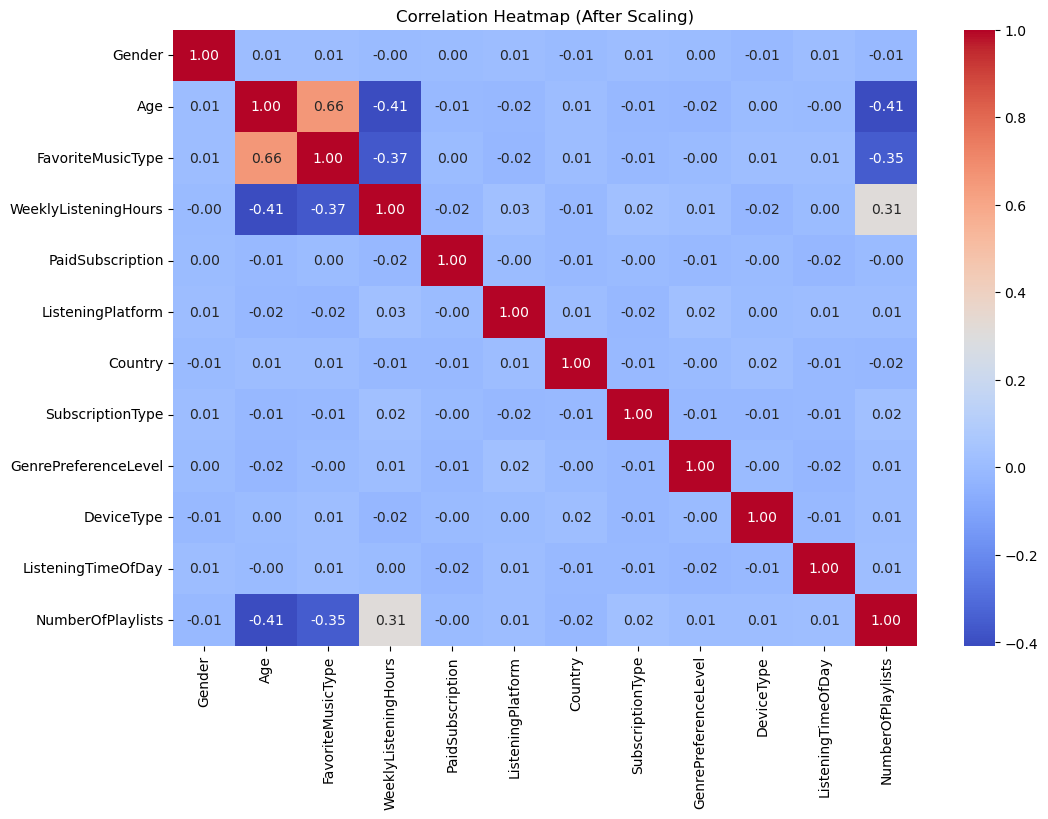

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df_scaled_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (After Scaling)")
plt.show()


### Elbow Method

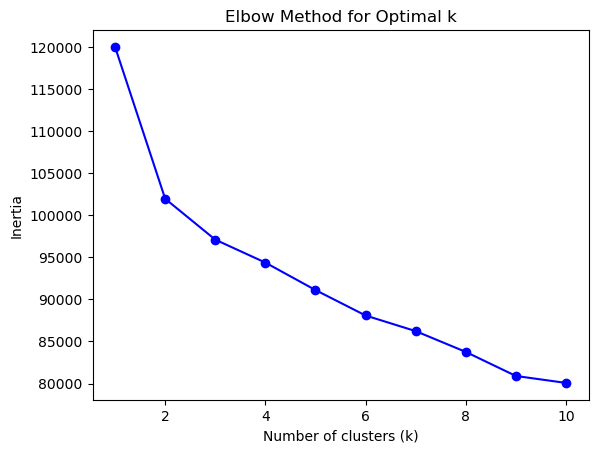

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

### Silhouette Score Interpretation

In [25]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    print(f"Silhouette Score for k={k}: {score:.3f}")

Silhouette Score for k=2: 0.144
Silhouette Score for k=3: 0.098
Silhouette Score for k=4: 0.085
Silhouette Score for k=5: 0.067
Silhouette Score for k=6: 0.071
Silhouette Score for k=7: 0.068
Silhouette Score for k=8: 0.074
Silhouette Score for k=9: 0.079
Silhouette Score for k=10: 0.079


In [26]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

In [27]:
df.groupby('Cluster').mean()

,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
Cluster,,,,,,,,,,,,
0,1.499089,23.320298,3.086164,20.446893,1.403148,3.021541,5.462469,2.527755,2.026843,2.490472,2.468268,48.275062
1,1.512736,37.388651,7.498108,13.255485,1.399243,2.957125,5.562169,2.460277,1.980580,2.515511,2.480958,25.448928


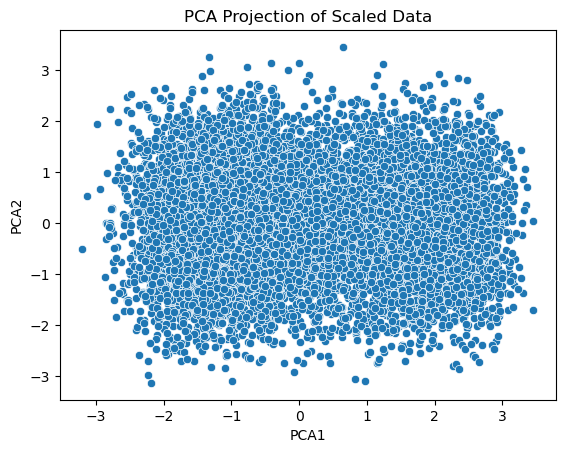

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled_df)

pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

sns.scatterplot(x='PCA1', y='PCA2', data=pca_df)
plt.title('PCA Projection of Scaled Data')
plt.show()

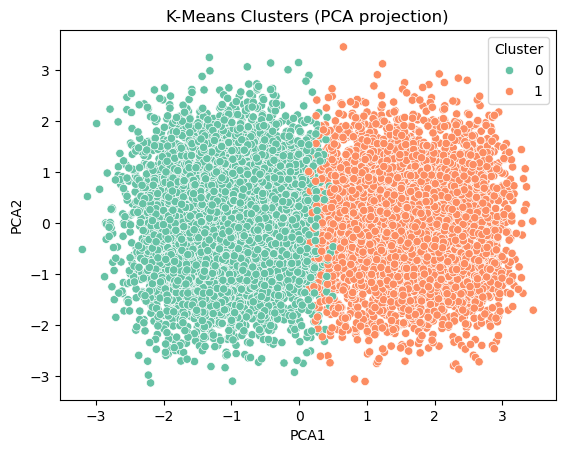

In [29]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('K-Means Clusters (PCA projection)')
plt.show()


In [30]:
df['Cluster'] = kmeans.labels_  # Add cluster labels if not already

cluster_profile = df.groupby('Cluster').mean(numeric_only=True)
cluster_profile

,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists,PCA1,PCA2
Cluster,,,,,,,,,,,,,,
0,1.499089,23.320298,3.086164,20.446893,1.403148,3.021541,5.462469,2.527755,2.026843,2.490472,2.468268,48.275062,-1.082443,0.001845
1,1.512736,37.388651,7.498108,13.255485,1.399243,2.957125,5.562169,2.460277,1.980580,2.515511,2.480958,25.448928,1.647552,-0.002809


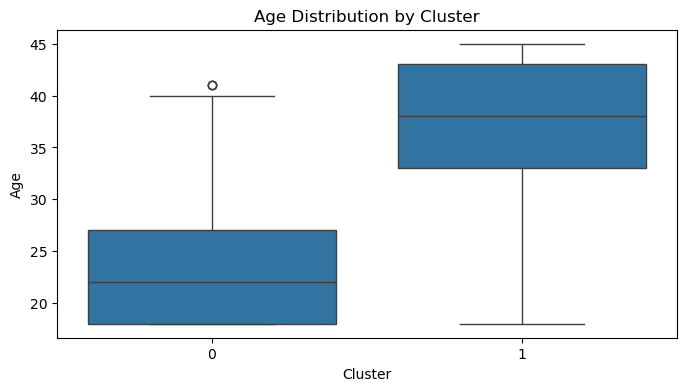

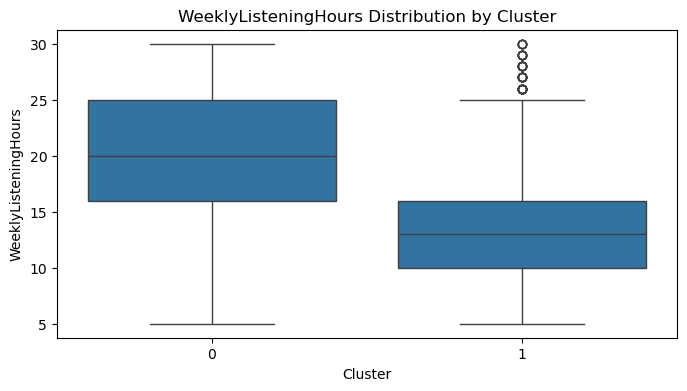

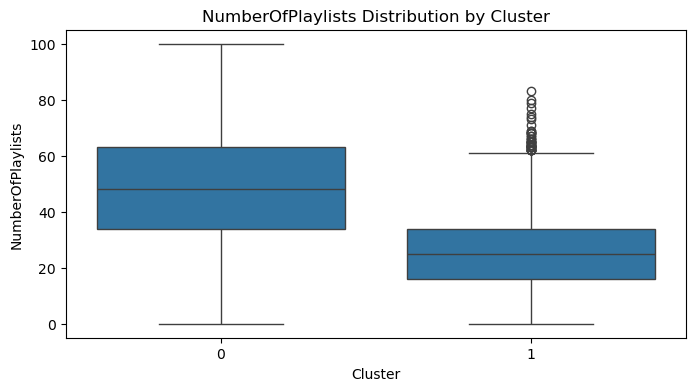

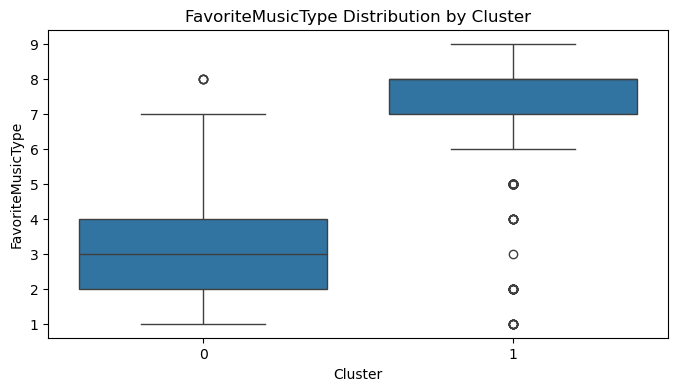

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

features_to_plot = ['Age', 'WeeklyListeningHours', 'NumberOfPlaylists','FavoriteMusicType']

for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'{feature} Distribution by Cluster')
    plt.show()


In [32]:
# Group by Cluster and get mean values
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)

# Transpose for easier reading
print(cluster_summary.T)


Cluster                       0          1
Gender                 1.499089   1.512736
Age                   23.320298  37.388651
FavoriteMusicType      3.086164   7.498108
WeeklyListeningHours  20.446893  13.255485
PaidSubscription       1.403148   1.399243
ListeningPlatform      3.021541   2.957125
Country                5.462469   5.562169
SubscriptionType       2.527755   2.460277
GenrePreferenceLevel   2.026843   1.980580
DeviceType             2.490472   2.515511
ListeningTimeOfDay     2.468268   2.480958
NumberOfPlaylists     48.275062  25.448928
PCA1                  -1.082443   1.647552
PCA2                   0.001845  -0.002809


In [33]:
print(cluster_summary.columns)  # These are the cluster labels
print(cluster_summary.index)    # These are your feature names


Index(['Gender', 'Age', 'FavoriteMusicType', 'WeeklyListeningHours',
       'PaidSubscription', 'ListeningPlatform', 'Country', 'SubscriptionType',
       'GenrePreferenceLevel', 'DeviceType', 'ListeningTimeOfDay',
       'NumberOfPlaylists', 'PCA1', 'PCA2'],
      dtype='object')
Index([0, 1], dtype='int32', name='Cluster')


In [34]:
print(cluster_summary.index)

Index([0, 1], dtype='int32', name='Cluster')


In [35]:
# Transpose the summary so that feature names are the row labels
cluster_summary = cluster_summary.T


In [36]:
for cluster in cluster_summary.columns:
    print(f"\nCluster {cluster}:")
    print(f"- Average Age: {cluster_summary.loc['Age', cluster]:.1f}")
    print(f"- Weekly Listening Hours: {cluster_summary.loc['WeeklyListeningHours', cluster]:.1f}")
    print(f"- Average Playlists: {cluster_summary.loc['NumberOfPlaylists', cluster]:.1f}")


Cluster 0:
- Average Age: 23.3
- Weekly Listening Hours: 20.4
- Average Playlists: 48.3

Cluster 1:
- Average Age: 37.4
- Weekly Listening Hours: 13.3
- Average Playlists: 25.4


In [37]:
# Count the most common category for each cluster
for feature in ['Age', 'FavoriteMusicType']:
    print(f"\nMost common {feature} by cluster:")
    print(df.groupby('Cluster')[feature].agg(lambda x: x.mode()[0]))



Most common Age by cluster:
Cluster
0    18
1    45
Name: Age, dtype: int64

Most common FavoriteMusicType by cluster:
Cluster
0    1
1    8
Name: FavoriteMusicType, dtype: int64


## MeanShift

In [38]:
## import
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [47]:
# Step 1: Standardize Features
features = ['Age', 'WeeklyListeningHours', 'NumberOfPlaylists']  # Adjust if needed
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Estimate Bandwidth (tune quantile for cluster granularity)
quantile = 0.2  # can try values between 0.1-0.3
bandwidth = estimate_bandwidth(X_scaled, quantile=quantile, n_samples=500)
print(f"Estimated Bandwidth: {bandwidth:.4f}")

# Step 3: Apply MeanShift Clustering
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)  # Faster with bin_seeding
ms.fit(X_scaled)
labels = ms.labels_
df['Cluster'] = labels  # Save clusters to DataFrame

# Step 4: Evaluate Results
n_clusters = len(np.unique(labels))
print(f"Number of clusters: {n_clusters}")

if n_clusters > 1:
    score = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {score:.4f} (0=overlap, 1=well-separated)")
else:
    print("Only one cluster found.")


Estimated Bandwidth: 1.4192
Number of clusters: 2
Silhouette Score: 0.3650 (0=overlap, 1=well-separated)


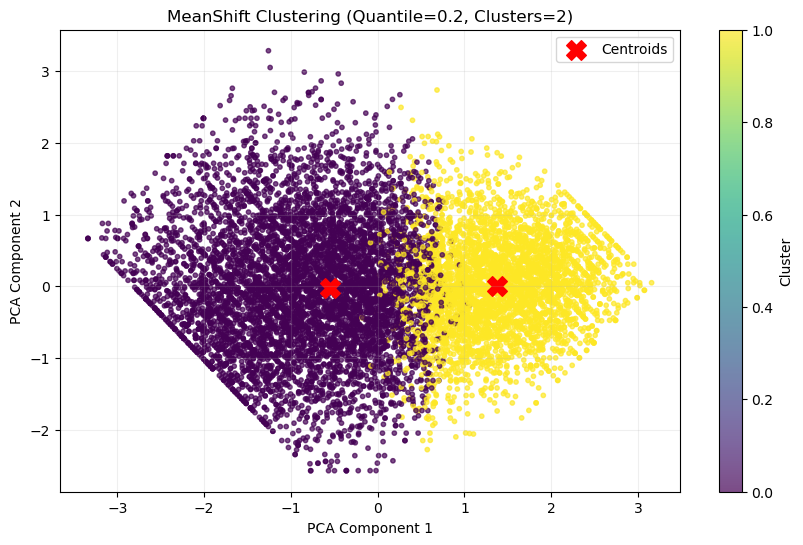

In [48]:
# Visualize Clusters (PCA 2D Projection)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7, s=10)
plt.title(f"MeanShift Clustering (Quantile={quantile}, Clusters={n_clusters})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')

# Plot centroids (if clusters exist)
if n_clusters > 0:
    centroids_pca = pca.transform(ms.cluster_centers_)
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

In [49]:
# Analyze Clusters
cluster_summary = df.groupby('Cluster')[features].agg(['mean', 'count'])
print("\nCluster Summary (Mean + Count):")
print(cluster_summary)


Cluster Summary (Mean + Count):
              Age       WeeklyListeningHours       NumberOfPlaylists      
             mean count                 mean count              mean count
Cluster                                                                   
0        23.25874  6207            20.463348  6207         48.279362  6207
1        38.12734  3793            12.902452  3793         24.406802  3793


## DBSCAN

In [44]:
from sklearn.cluster import DBSCAN

[0 0 0 ... 0 0 0]
Number of noise points: 7


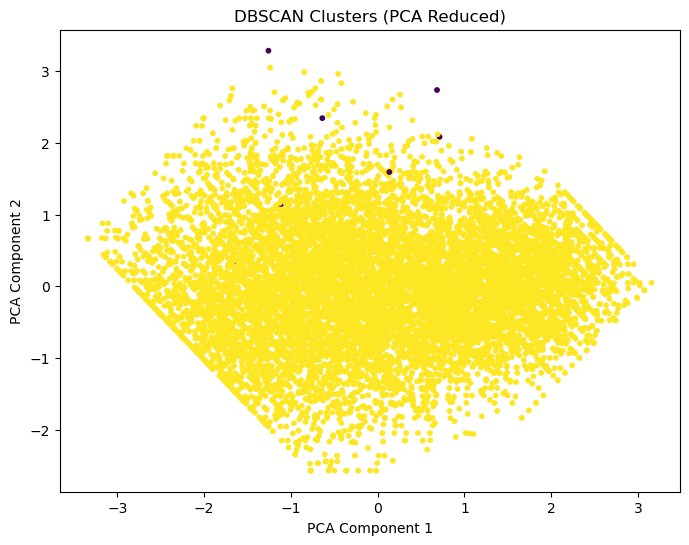

In [46]:
# Step 1: Standardize Features
features = ['Age', 'WeeklyListeningHours', 'NumberOfPlaylists']  # Adjust if needed
X = df[features]
scaler = StandardScaler()
Data_scaled = scaler.fit_transform(X)

# setup DBSCAN
dbscan = DBSCAN(eps=3, min_samples=5)

# Fit DBSCAN to the data
dbscan_labels = dbscan.fit_predict(Data_scaled)

# Check the labels assigned by DBSCAN
print(dbscan_labels)

# The -1 label is used for outliers/noise points
print(f"Number of noise points: {list(dbscan_labels).count(-1)}")

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Data_scaled)

# Visualize DBSCAN clustering in PCA-reduced space
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', s=10)
plt.title('DBSCAN Clusters (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## Below dk what is that

In [40]:
import numpy as np
import pandas as pd

np.random.seed(42)
n = 10000
music_types = ['Rock', 'Pop', 'J-Pop', 'K-Pop', 'EDM', 'Jazz', 'Chill', 'Oldies', 'Traditional']

# 定义每种音乐类型的主年龄段、听歌时长、歌单数均值
music_type_params = {
    'Rock':         {'age_mu': 25, 'age_sigma': 6, 'hours_mu': 18, 'hours_sigma': 6, 'pl_mu': 40, 'pl_sigma': 20},
    'Pop':          {'age_mu': 23, 'age_sigma': 7, 'hours_mu': 20, 'hours_sigma': 7, 'pl_mu': 45, 'pl_sigma': 22},
    'J-Pop':        {'age_mu': 22, 'age_sigma': 5, 'hours_mu': 22, 'hours_sigma': 6, 'pl_mu': 50, 'pl_sigma': 18},
    'K-Pop':        {'age_mu': 21, 'age_sigma': 5, 'hours_mu': 23, 'hours_sigma': 7, 'pl_mu': 55, 'pl_sigma': 20},
    'EDM':          {'age_mu': 24, 'age_sigma': 6, 'hours_mu': 25, 'hours_sigma': 8, 'pl_mu': 60, 'pl_sigma': 25},
    'Jazz':         {'age_mu': 35, 'age_sigma': 8, 'hours_mu': 15, 'hours_sigma': 5, 'pl_mu': 30, 'pl_sigma': 15},
    'Chill':        {'age_mu': 32, 'age_sigma': 10, 'hours_mu': 17, 'hours_sigma': 6, 'pl_mu': 35, 'pl_sigma': 18},
    'Oldies':       {'age_mu': 40, 'age_sigma': 7, 'hours_mu': 13, 'hours_sigma': 5, 'pl_mu': 25, 'pl_sigma': 12},
    'Traditional':  {'age_mu': 42, 'age_sigma': 6, 'hours_mu': 12, 'hours_sigma': 4, 'pl_mu': 20, 'pl_sigma': 10},
}

# 随机分配音乐类型（可根据实际比例调整）
music_type_choices = np.random.choice(music_types, size=n, p=[0.13,0.13,0.10,0.10,0.10,0.10,0.12,0.12,0.10])

ages = []
hours = []
playlists = []

for mt in music_type_choices:
    p = music_type_params[mt]
    age = np.clip(np.random.normal(p['age_mu'], p['age_sigma']), 18, 45)
    hour = np.clip(np.random.normal(p['hours_mu'], p['hours_sigma']), 5, 30)
    pl = np.clip(np.random.normal(p['pl_mu'], p['pl_sigma']), 0, 100)
    ages.append(int(age))
    hours.append(int(hour))
    playlists.append(int(pl))

df = pd.DataFrame({
    'UserID': np.arange(1, n+1),
    'Gender': np.random.choice(['Male', 'Female'], n),
    'Age': ages,
    'FavoriteMusicType': music_type_choices,
    'WeeklyListeningHours': hours,
    'PaidSubscription': np.random.choice(['Yes', 'No'], n, p=[0.6, 0.4]),
    'ListeningPlatform': np.random.choice(['Spotify', 'Apple Music', 'QQ Music', 'NetEase Cloud', 'YouTube Music'], n),
    'Country': np.random.choice(['China', 'USA', 'Japan', 'Korea', 'UK', 'Germany', 'France', 'Brazil', 'India', 'Australia'], n),
    'SubscriptionType': np.random.choice(['Free', 'Premium', 'Family', 'Student'], n),
    'GenrePreferenceLevel': np.random.choice(['High', 'Medium', 'Low'], n),
    'DeviceType': np.random.choice(['Mobile', 'PC', 'Tablet', 'Smart Speaker'], n),
    'ListeningTimeOfDay': np.random.choice(['Morning', 'Afternoon', 'Evening', 'Night'], n),
    'NumberOfPlaylists': playlists
})

df.to_csv('music_users.csv', index=False)